# Day 2 - Comparisons: Pictograph

Guam is separated into 19 [villages](https://en.wikipedia.org/wiki/Villages_of_Guam) spread across the island. The total population of Guam is approximately 170,000 as of 2020.


## Data

Census data from 2020 is not available yet so I will be using 2010 census data found [here](https://bsp.guam.gov/2010-census-of-population-and-housing/). I pulled the specific data from the excel sheet into a CSV file located in this folder.



In [138]:
import pandas as pd

with open('guam_2010_census.csv', 'r') as f:
    df = pd.read_csv(f, index_col='Ethnicity')

## Binning

The largest village has a population of 44,943 and the smallest has a population of 782. A binning size of 500 will at least provide the smallest village with a single population icon. The larger villages will need to have multiple rows of icons to have a pictogram with a decent aspect ratio.

In [146]:
import pandas as pd

with open('guam_2010_census.csv', 'r') as f:
    df = pd.read_csv(f, index_col='Ethnicity')

df

,Guam,Agana Heights,Agat,Asan-Maina,Barrigada,Chalan Pago-Ordot,Dededo,Hagatna,Inarajan,Mangilao,Merizo,Mongmong-Toto-Maite,Piti,Santa Rita,Sinajana,Talofofo,Tamuning,Umatac,Yigo,Yona
Ethnicity,,,,,,,,,,,,,,,,,,,,
Total,159358,3808,4917.0,2137.0,8875,6822,44943,1051,2273.0,15191,1850.0,6825,1454.0,6084.0,2592.0,3050.0,19685,782.0,20539,6480.0
One Ethnic Origin or Race:,144429,3437,4421.0,1855.0,8015,6118,40974,902,2121.0,13634,1649.0,6086,1280.0,5531.0,2332.0,2773.0,17927,666.0,18797,5911.0
Native Hawaiian and Other Pacific Islander:,78582,2725,3046.0,1374.0,5105,4497,18113,640,1931.0,8974,1515.0,4358,835.0,2299.0,1843.0,2213.0,5824,624.0,7891,4775.0
Carolinian,242,4,9.0,NaN,11,2,62,2,NaN,8,NaN,59,3.0,10.0,8.0,2.0,11,NaN,31,20.0
Chamorro,59381,2349,2694.0,1242.0,4235,3922,12326,397,1844.0,6408,1442.0,3202,729.0,2144.0,1635.0,2013.0,2988,584.0,4996,4231.0
Chuukese,11230,242,276.0,94.0,472,278,3414,165,41.0,1446,27.0,750,50.0,79.0,131.0,114.0,1673,34.0,1601,343.0
Kosraean,425,5,NaN,NaN,20,13,99,9,NaN,39,NaN,51,NaN,2.0,5.0,1.0,74,NaN,99,8.0
Marshallese,315,5,2.0,8.0,17,4,60,11,NaN,72,2.0,48,9.0,NaN,NaN,NaN,54,NaN,18,5.0
Palauan,2563,32,17.0,7.0,140,64,1069,13,9.0,523,5.0,67,5.0,20.0,22.0,26.0,230,2.0,257,55.0


In [97]:
# matplotlib config
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 12]
mpl.rcParams['figure.dpi'] = 72

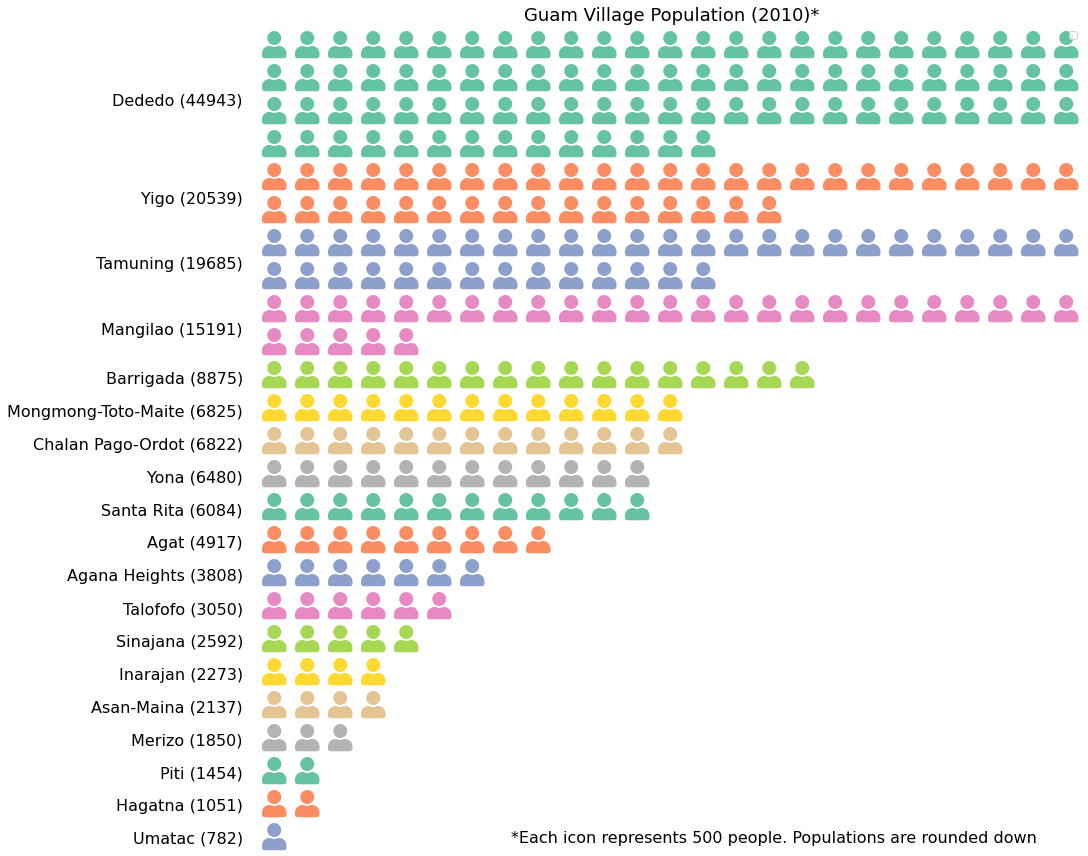

In [149]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

column_num = 25

fig = plt.figure(
    FigureClass=Waffle,
    values=binned_pop,
    columns=column_num,
    vertical=True,
    starting_location='NW',
    block_arranging_style='new-line',
    icons=['user'] * len(total_pop),
    font_size=28,
)

# Aligning the labels based on number of lines of icons
y = 0.95  # starting y
line_y = -0.038  # y shift per line
for k, v in binned_pop.items():
    pop_lines = (v // column_num) + 1
    fig.text(x=-0.010,
             y=((y + (y + pop_lines * line_y)) / 2),
             s=f'{k} ({total_pop[k]})',
             fontsize=16,
             ha='right')
    y += line_y * pop_lines

plt.title("Guam Village Population (2010)*", fontsize=18)
fig.text(x=.3, y=0.02,
         s=f'*Each icon represents {pop_per_hist} people. Populations are rounded down',
         fontsize = 16)
plt.legend([])
plt.show()